## Phase 3 (Data Preparation)

Datan esikäsittelyvaiheessa on tarkoitus käsitellä ja valmistella data sellaiseen kuntoon, että sitä voidaan käyttää helposti mallinnusvaiheessa ilman merkittäviä lisämuokkauksia.   
   
Vaiheessa keskitytyään esimerkiksi tietojen: 
- Puhdistamiseen 
- Muokkaamiseen 
- Valitsemiseen   

- Lopuksi data skaalataan ja/tai normalisoidaan. 

Vaiheessa on paljon tekemistä, mutta sen onnistuminen on tärkeä myös koko projektin onnistumisen kannalta. Datan esikäsittelyvaiheeseen saatetaan joutua palaamaan takaisin vielä myöhemmässä vaiheessa projektia. 


### Tästä lähtee datan esikäsittelyvaiheen toteutus

- Ladataan esikäsittelemätön data

In [ ]:
#import kaggle
#import zipfile
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

file_path = r"C:\Lataukset\used_cars\used_cars_data.csv"

# Get the total number of rows
total_rows = sum(1 for _ in open(file_path, encoding='ISO-8859-1'))  # Count rows for progress

# Create an empty dataframe to accumulate chunks
dataframe = pd.DataFrame()

# Read in chunks and display a progress bar
chunk_size = 10000  # You can adjust the chunk size based on your memory capacity
for chunk in tqdm(pd.read_csv(file_path, chunksize=chunk_size), total=total_rows // chunk_size, desc="Loading CSV"):
    dataframe = pd.concat([dataframe, chunk])

print("Data loaded successfully.")

In [ ]:
#import pandas as pd
#from tqdm import tqdm
#import warnings
#warnings.filterwarnings('ignore')


#file_path = r"C:\Users\Omistaja\Desktop\AI_DA-projekti\aida-projekti-syksy-2024-ryhma-1\docs\us_used_cars\used_cars_data.csv"
#dataframe = pd.read_csv(file_path, nrows=100000)


Sarakkeiden poistoja:

- Poistetaan sarakkeita, joilla ei katsota olevan arvoa lopputuloksen kannalta
- Poistetaan sarakkeet, joissa liikaa NaN-arvoja
- Poistetaan toinen sellaisista sarakkeista, jotka sisältävät saman tiedon

In [2]:

# Näillä sarakkeilla ei katsota olevan arvoa lopputuloksen kannalta
dataframe.drop(columns=[
    'vin',
    'description',
    'listing_id',
    'main_picture_url',
    'bed',
    'bed_height',
    'bed_length',
    'cabin',
    'combine_fuel_economy',
    'is_certified',
    'is_cpo',
    'is_oemcpo',
    'latitude',
    'longitude',
    'vehicle_damage_category',
    'engine_type',
    'engine_cylinders'
    ],axis=1,inplace=True)

#`trim_name` ja `trimId` sisältävät samaa tietoa, joten pudotetaan `trimId`-sarake.
# `wheel_system` ja `wheel_system_display` sisältävät saman tiedon, joten poistetaan `wheel_system`.
dataframe.drop(columns=[
    'trimId', 
    'wheel_system'
    ],axis=1, inplace=True)

dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          95046 non-null   object 
 1   body_type             99599 non-null   object 
 2   city                  100000 non-null  object 
 3   city_fuel_economy     83984 non-null   float64
 4   daysonmarket          100000 non-null  int64  
 5   dealer_zip            100000 non-null  int64  
 6   engine_displacement   94661 non-null   float64
 7   exterior_color        98607 non-null   object 
 8   fleet                 56925 non-null   object 
 9   frame_damaged         56925 non-null   object 
 10  franchise_dealer      100000 non-null  bool   
 11  franchise_make        74584 non-null   object 
 12  front_legroom         95046 non-null   object 
 13  fuel_tank_volume      95046 non-null   object 
 14  fuel_type             97541 non-null   object 
 15  h

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,exterior_color,fleet,frame_damaged,...,sp_name,theft_title,torque,transmission,transmission_display,trim_name,wheel_system_display,wheelbase,width,year
0,35.1 in,SUV / Crossover,Bayamon,NaN,522,960,1300.0,Solar Yellow,NaN,NaN,...,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,Latitude FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,38.1 in,SUV / Crossover,San Juan,NaN,207,922,2000.0,Narvik Black,NaN,NaN,...,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,S AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,35.4 in,Sedan,Guaynabo,17.0,1233,969,2500.0,NaN,False,False,...,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,Base,All-Wheel Drive,104.3 in,78.9 in,2016
3,37.6 in,SUV / Crossover,San Juan,NaN,196,922,3000.0,Eiger Gray,NaN,NaN,...,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,V6 HSE AWD,All-Wheel Drive,115 in,87.4 in,2020
4,38.1 in,SUV / Crossover,San Juan,NaN,137,922,2000.0,Narvik Black,NaN,NaN,...,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,S AWD,All-Wheel Drive,107.9 in,85.6 in,2020


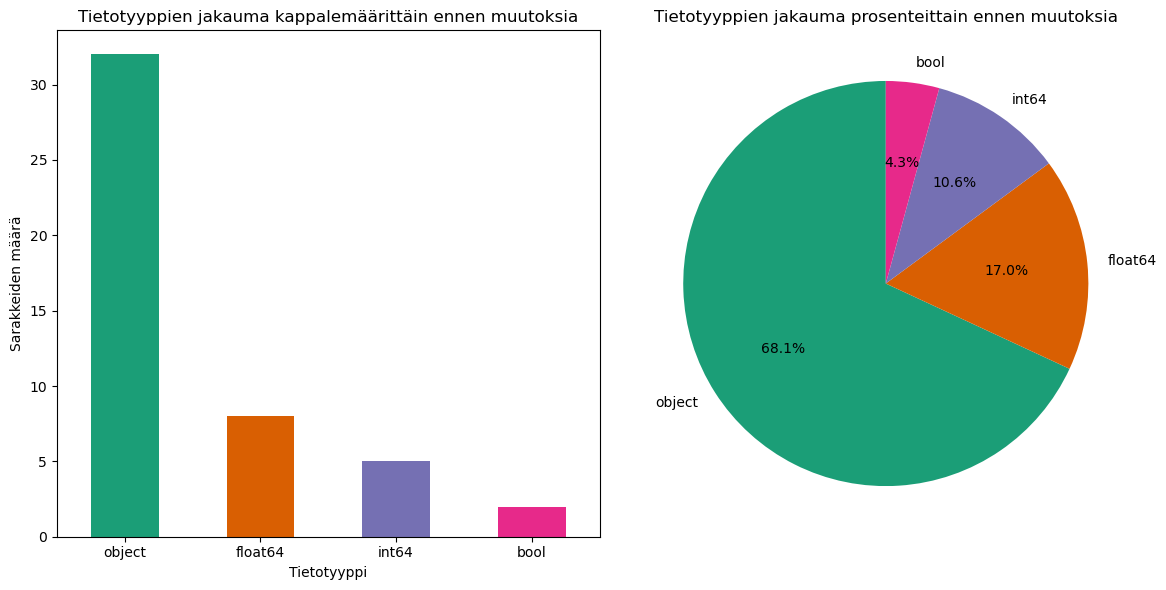

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm

data_types_plot1 = dataframe.dtypes.value_counts()
colors = cm.Dark2.colors

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Barplot
data_types_plot1.plot(
    kind="bar",
    ax=axes[0],
    title="Tietotyyppien jakauma kappalemäärittäin ennen muutoksia",
    xlabel="Tietotyyppi",
    ylabel="Sarakkeiden määrä",
    color=colors
)

axes[0].tick_params(axis="x", rotation=0)

# Pie
data_types_plot1.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    title="Tietotyyppien jakauma prosenteittain ennen muutoksia",
    ylabel="",
    colors=colors
)


# Show the plot
plt.tight_layout()
plt.show()

Data-tyyppien muutokset:

- Muutetaan objekti-tyyppiset sarakkeet numeeriseksi ja booleaniksi kun mahdollista
- Päivämäärän käsittely

In [4]:
# Preprosessataan nämä objekti-kolumnit numeriseksi:

# back_legroom numeriseksi
dataframe['back_legroom'] = dataframe['back_legroom'].astype(str).apply(lambda x: x.split()[0])
dataframe['back_legroom'] = pd.to_numeric(dataframe['back_legroom'], errors='coerce')

# dealer_zip numeriseksi
dataframe['dealer_zip'] = pd.to_numeric(dataframe['dealer_zip'], errors='coerce')
#print(dataframe['dealer_zip'].dtype) - float64

# front_legroom numeriseksi
dataframe['front_legroom'] = dataframe['front_legroom'].astype(str).apply(lambda x: x.split()[0])
dataframe['front_legroom'] = pd.to_numeric(dataframe['front_legroom'], errors='coerce')

# fuel_tank_volume numeriseksi
dataframe['fuel_tank_volume'] = dataframe['fuel_tank_volume'].astype(str).apply(lambda x: x.split()[0])
dataframe['fuel_tank_volume'] = pd.to_numeric(dataframe['fuel_tank_volume'], errors='coerce')

# height numeriseksi
dataframe['height'] = dataframe['height'].astype(str).apply(lambda x: x.split()[0])
dataframe['height'] = pd.to_numeric(dataframe['height'], errors='coerce')

# lenght numeriseksi
dataframe['length'] = dataframe['length'].astype(str).apply(lambda x: x.split()[0])
dataframe['length'] = pd.to_numeric(dataframe['length'], errors='coerce')

# maximum_seating numeriseksi
dataframe['maximum_seating'] = dataframe['maximum_seating'].astype(str).apply(lambda x: x.split()[0])
dataframe['maximum_seating'] = pd.to_numeric(dataframe['maximum_seating'], errors='coerce')

# wheelbase numeriseksi
dataframe['wheelbase'] = dataframe['wheelbase'].astype(str).apply(lambda x: x.split()[0])
dataframe['wheelbase'] = pd.to_numeric(dataframe['wheelbase'], errors='coerce')

# width numeriseksi
dataframe['width'] = dataframe['width'].astype(str).apply(lambda x: x.split()[0])
dataframe['width'] = pd.to_numeric(dataframe['width'], errors='coerce')




In [5]:
# Preprosessataan nämä objekti-kolumnit booleaniksi:

# fleet boolenaiksi
dataframe['fleet'] = dataframe['fleet'].map({'True': True, 'False': False})
dataframe['fleet'] = dataframe['fleet'].fillna(False)

# frame_damaged boolenaiksi
dataframe['frame_damaged'] = dataframe['frame_damaged'].map({'True': True, 'False': False})
dataframe['frame_damaged'] = dataframe['frame_damaged'].fillna(False)

# has_accidents boolenaiksi
dataframe['has_accidents'] = dataframe['has_accidents'].map({'True': True, 'False': False})
dataframe['has_accidents'] = dataframe['has_accidents'].fillna(False)

# isCab booleaniksi
dataframe['isCab'] = dataframe['isCab'].map({'True': True, 'False': False})
dataframe['isCab'] = dataframe['isCab'].fillna(False)

# salvage booleaniksi
dataframe['salvage'] = dataframe['salvage'].map({'True': True, 'False': False})
dataframe['salvage'] = dataframe['salvage'].fillna(False) 

# theft_title booleaniksi
dataframe['theft_title'] = dataframe['theft_title'].map({'True': True, 'False': False})
dataframe['theft_title'] = dataframe['theft_title'].fillna(False)

In [6]:
# Päivämäärän käsittely ja luodaan uusia sarakkeita

# muutetaan date datetimeen
dataframe['listed_date'] = pd.to_datetime(dataframe['listed_date'], errors='coerce')

# lisätietoa vuosista päivistä ja kuukausista
dataframe['listed_year'] = dataframe['listed_date'].dt.year
dataframe['listed_month'] = dataframe['listed_date'].dt.month
dataframe['listed_dayofweek'] = dataframe['listed_date'].dt.dayofweek

In [7]:
# Jaetaan power -sarake hevosvoimiksi (power_hp) ja kierrosluvuiksi (power_rmp)

dataframe['power_hp'] = dataframe['power'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
dataframe['power_rpm'] = dataframe['power'].apply(lambda x: x.split()[3] if isinstance(x, str) and len(x.split()) >= 4 else None)

dataframe['power_hp'] = pd.to_numeric(dataframe['power_hp'], errors='coerce')
dataframe['power_rpm'] = pd.to_numeric(dataframe['power_rpm'], errors='coerce')

# Poistetaan alkuperäinen power -sarake
dataframe.drop(columns=['power'], inplace=True)


In [8]:
# Jaetaan torque samalla tavallu kun power
dataframe['torque_value'] = dataframe['torque'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
dataframe['torque_rpm'] = dataframe['torque'].apply(lambda x: x.split()[3] if isinstance(x, str) and len(x.split()) >= 4 else None)

dataframe['torque_value'] = pd.to_numeric(dataframe['torque_value'], errors='coerce')
dataframe['torque_rpm'] = pd.to_numeric(dataframe['torque_rpm'], errors='coerce')

# Poistetaan alkuperäinen torque -sarake
dataframe.drop(columns=['torque'], inplace=True)



In [9]:

# sp_name on hankala, koska niin monta unique arvoa voi joko dropata tai ehkä ryhmitellä top 10 myyjää
# dataframe.drop(columns=['sp_name'], inplace=True)



Välitsekkaus sarakkeiden tyyppimuunnoksista.

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   back_legroom          91717 non-null   float64       
 1   body_type             99599 non-null   object        
 2   city                  100000 non-null  object        
 3   city_fuel_economy     83984 non-null   float64       
 4   daysonmarket          100000 non-null  int64         
 5   dealer_zip            100000 non-null  int64         
 6   engine_displacement   94661 non-null   float64       
 7   exterior_color        98607 non-null   object        
 8   fleet                 100000 non-null  bool          
 9   frame_damaged         100000 non-null  bool          
 10  franchise_dealer      100000 non-null  bool          
 11  franchise_make        74584 non-null   object        
 12  front_legroom         94234 non-null   float64       
 13  

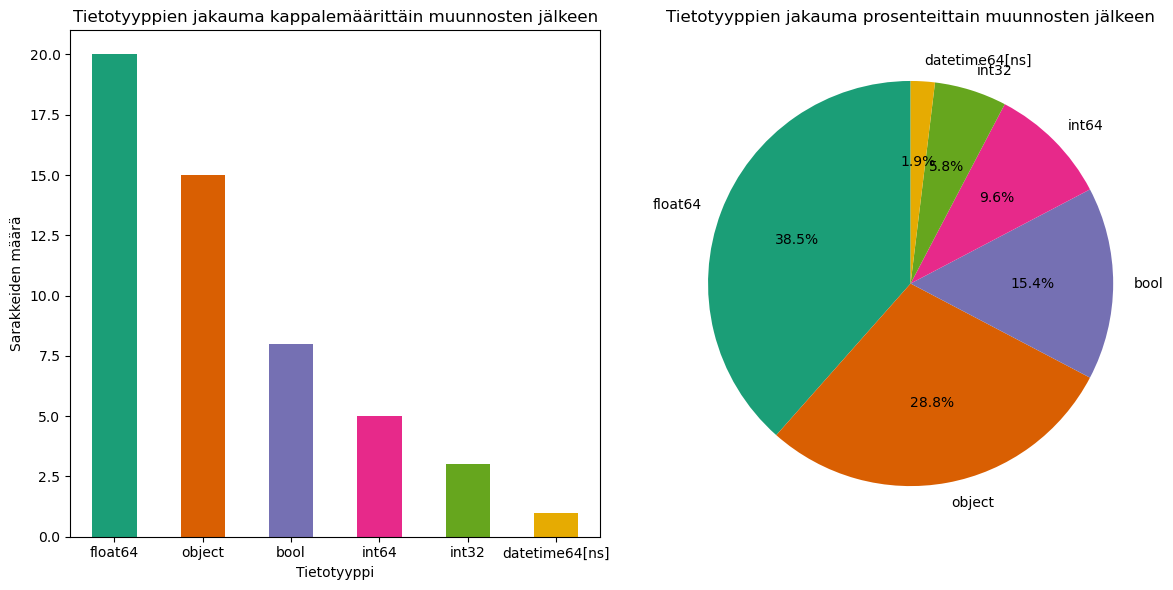

In [11]:
import matplotlib.pyplot as plt

data_types_plot2 = dataframe.dtypes.value_counts()
colors = cm.Dark2.colors

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Barplot
data_types_plot2.plot(
    kind="bar",
    ax=axes[0],
    title="Tietotyyppien jakauma kappalemäärittäin muunnosten jälkeen",
    xlabel="Tietotyyppi",
    ylabel="Sarakkeiden määrä",
    color=colors
)

axes[0].tick_params(axis="x", rotation=0)

# Pie
data_types_plot2.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    title="Tietotyyppien jakauma prosenteittain muunnosten jälkeen",
    ylabel="",
    colors=colors
)

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
print("Statistical Summary of Numerical Columns:")
dataframe = dataframe.query('year >= 1990')
round(dataframe.select_dtypes(exclude = ['object']).describe() , 2)

Statistical Summary of Numerical Columns:


,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,...,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,power_hp,power_rpm,torque_value,torque_rpm
count,91705.00,83974.00,99909.00,99909.00,94638.00,94216.0,94990.00,95002.00,83974.00,94638.00,...,95002.00,95002.00,99909.00,99909.00,99909.00,99909.00,85674.00,96.00,84627.00,1542.00
mean,37.67,22.24,77.57,14346.02,2801.92,42.1,18.24,65.08,29.09,245.40,...,113.21,78.43,2017.59,2019.92,7.24,3.39,248.89,615.56,258.34,201.00
min,0.00,8.00,0.00,922.00,700.00,35.8,1.90,43.90,11.00,70.00,...,73.50,61.40,1990.00,2014.00,1.00,0.00,70.00,516.00,68.00,200.00
25%,35.80,18.00,14.00,6704.00,2000.00,41.0,14.90,58.10,25.00,176.00,...,106.30,72.60,2017.00,2020.00,7.00,2.00,179.00,600.00,178.00,200.00
50%,38.00,21.00,36.00,7960.00,2500.00,41.8,17.40,65.50,28.00,241.00,...,110.60,78.30,2019.00,2020.00,8.00,3.00,245.00,600.00,258.00,200.00
75%,39.40,25.00,82.00,11743.00,3500.00,43.0,20.00,69.30,32.00,295.00,...,115.00,83.50,2020.00,2020.00,8.00,5.00,300.00,650.00,295.00,200.00
max,49.00,127.00,2150.00,98108.00,8400.00,67.0,63.50,117.60,127.00,808.00,...,201.00,105.90,2021.00,2020.00,12.00,6.00,808.00,650.00,935.00,400.00
std,2.95,7.81,109.36,15501.11,1159.02,1.6,4.65,7.28,7.06,86.52,...,11.72,7.12,3.55,0.30,2.12,1.64,87.67,40.10,103.66,8.87


Katsotaan mitä arvoja jäljelle jääneet "object" -tyyppiset sarakkeet pitävät sisällään.

Nämä pitää esikäsitellä mallin ymmärtämään muotoon, esim. encoding.

Osassa sarakkeita liikaa uniikkeja arvoja encoodauksen kannalta.

In [13]:
cat_cols = dataframe.select_dtypes(include=['object']).columns
for col in cat_cols:
    unique_values = dataframe[col].unique()
    print(f"Total unique values: {len(unique_values)}")
    print("Top 10 most common values:")
    print(dataframe[col].value_counts().head(10))  # Show top 10 most common values
    print("\n")


Total unique values: 10
Top 10 most common values:
body_type
SUV / Crossover    52651
Sedan              26907
Pickup Truck        8905
Hatchback           2594
Coupe               2223
Van                 2133
Minivan             1811
Wagon               1401
Convertible          890
Name: count, dtype: int64


Total unique values: 425
Top 10 most common values:
city
Clinton Township    1734
Brooklyn            1638
Danbury             1502
Novi                1452
Stamford            1374
Rochester Hills     1335
Bronx               1326
Waterbury           1309
Huntington          1187
Nashua              1156
Name: count, dtype: int64


Total unique values: 4294
Top 10 most common values:
exterior_color
Black                              7031
White                              4407
Gray                               3144
Silver                             2256
Summit White                       2069
Blue                               1949
Oxford White                       1491
Red

In [14]:
cat_cols = dataframe.select_dtypes(include=['object']).columns

# Calculate null counts for each categorical column
null_counts = dataframe[cat_cols].isnull().sum()
print(null_counts)

body_type                 394
city                        0
exterior_color           1391
franchise_make          25339
fuel_type                2399
interior_color          11775
listing_color               0
major_options            6407
make_name                   0
model_name                  0
sp_name                     0
transmission             1001
transmission_display     1001
trim_name                3800
wheel_system_display     4562
dtype: int64


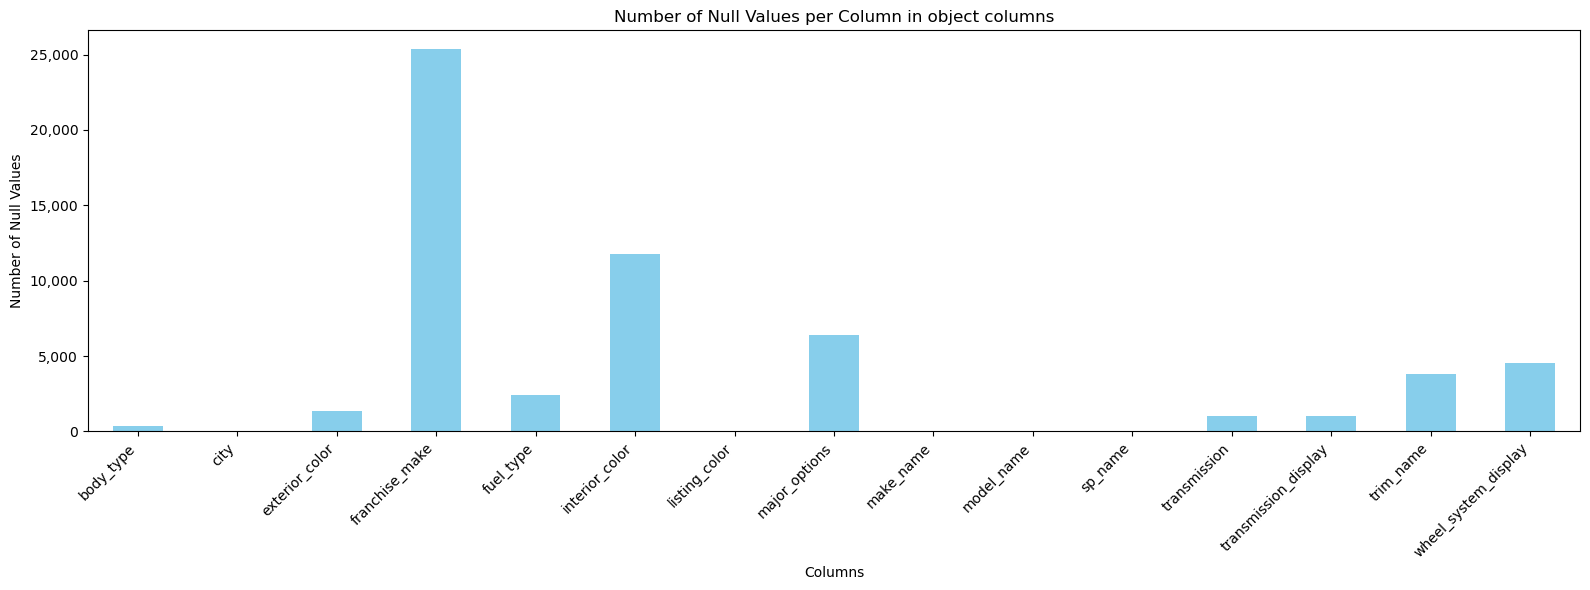

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
null_counts.plot.bar(color='skyblue')
plt.title('Number of Null Values per Column in object columns')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

In [16]:
columns_to_check = ['front_legroom', 'fuel_tank_volume', 'height', 'maximum_seating', 
                    'power_hp', 'power_rpm', 'torque_rpm', 'wheelbase', 'width', 'back_legroom']

for col in columns_to_check:
    count = (dataframe[col] == '--').sum()
    print(f"Column '{col}' has {count} rows with '--'")
    

Column 'front_legroom' has 0 rows with '--'
Column 'fuel_tank_volume' has 0 rows with '--'
Column 'height' has 0 rows with '--'
Column 'maximum_seating' has 0 rows with '--'
Column 'power_hp' has 0 rows with '--'
Column 'power_rpm' has 0 rows with '--'
Column 'torque_rpm' has 0 rows with '--'
Column 'wheelbase' has 0 rows with '--'
Column 'width' has 0 rows with '--'
Column 'back_legroom' has 0 rows with '--'


In [ ]:
a =('''
Muutettu objekteista numeeriseksi dataa. Joitakin booliksi meneviä jäänyt objektiksi NaN arvojen takia. Dropattu turhia sarakkeita.
Työstetty date column -> muutama uusi. Jotkut objektit vaativat työstöä encodingina varten. 
''')
print(a)

In [ ]:
sara = ('''
Jouduin rullaamaan koodin nrows=1000000 rivillä kun ei oikein mennyt läpi koko datalla, eli voi alusta tuon poistaa ken kykenee datan ajaa koko datalla :D
Siistitty koodia ehkä selkeämpiin kokonaisuuksiin (mitä tehty missäkin vaiheessa), pudotettu sarakkeita ja muokattu tyyppejä, Valtteri oli kyllä jo hyvin alustanutkin tyyppimuunnoksia
One-hot-encoodaus varmaan tuonne missä muitakin sarakkeiden tyyppimuunnoksia.. voi olla kyllä muuallakin jos katsoo parhaaksi
''')
print(sara)

NaN-arvojen käsittelyä ja lisää sarakkeiden poistoa:

- Katsotaan sarakkeittain NaN-arvojen määriä suuruus järjestyksessä
- Yhdistetään 'make_name' ja 'franchise_make' -sarakkeet, sillä suuri osa arvoista yhtenäisiä
- Poistetaan sarakkeet, jotka pitävät sisällään suurimman määrän NaN-arvoja
- Lopuksi poistetaan kaikki rivit, jotka pitävät sisällään NaN-arvoja

In [17]:
nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted)

Rivien määrä: 99909
Sarakkeiden määrä: 52
tyhjien arvojen määrä per sarake
                  Column  NaN_Count
0              power_rpm      99813
1             torque_rpm      98367
2            owner_count      45663
3         franchise_make      25339
4      city_fuel_economy      15935
5   highway_fuel_economy      15935
6           torque_value      15282
7               power_hp      14235
8         interior_color      11775
9           back_legroom       8204
10         major_options       6407
11         front_legroom       5693
12            horsepower       5271
13   engine_displacement       5271
14      fuel_tank_volume       4919
15       maximum_seating       4908
16                 width       4907
17                height       4907
18             wheelbase       4907
19                length       4907
20  wheel_system_display       4562
21             trim_name       3800
22               mileage       3552
23             fuel_type       2399
24        exterior_color 

In [18]:
# Filter rows with non-NaN values in 'power_rpm'
filtered_df = dataframe[dataframe['power_rpm'].notna()]

len(filtered_df)

96

In [19]:
# Replace NaN in franchise_make with values from make_name
dataframe['franchise_make'] = dataframe['franchise_make'].fillna(dataframe['make_name'])

# Find rows where franchise_make is different from make_name
mismatch_count = (dataframe['franchise_make'] != dataframe['make_name']).sum()

print(f"Number of rows with different franchise_make and make_name: {mismatch_count}")

Number of rows with different franchise_make and make_name: 10957


In [20]:
#tarkistetaan nyt franchise make

nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted)

Rivien määrä: 99909
Sarakkeiden määrä: 52
tyhjien arvojen määrä per sarake
                  Column  NaN_Count
0              power_rpm      99813
1             torque_rpm      98367
2            owner_count      45663
3   highway_fuel_economy      15935
4      city_fuel_economy      15935
5           torque_value      15282
6               power_hp      14235
7         interior_color      11775
8           back_legroom       8204
9          major_options       6407
10         front_legroom       5693
11   engine_displacement       5271
12            horsepower       5271
13      fuel_tank_volume       4919
14       maximum_seating       4908
15             wheelbase       4907
16                 width       4907
17                length       4907
18                height       4907
19  wheel_system_display       4562
20             trim_name       3800
21               mileage       3552
22             fuel_type       2399
23        exterior_color       1391
24          transmission 

In [21]:
#poistetaan eniten tyhjiä arvoja sisältävät sarakkeet
dataframe.drop(columns=['power_rpm', 'torque_rpm', 'owner_count'], inplace=True)

nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted.head(10))

Rivien määrä: 99909
Sarakkeiden määrä: 49
tyhjien arvojen määrä per sarake
                 Column  NaN_Count
0  highway_fuel_economy      15935
1     city_fuel_economy      15935
2          torque_value      15282
3              power_hp      14235
4        interior_color      11775
5          back_legroom       8204
6         major_options       6407
7         front_legroom       5693
8   engine_displacement       5271
9            horsepower       5271


In [22]:
#Testataan paljonko jää rivejä jos poistetaan kaikki NaN

cleaned_df = dataframe.dropna()

print(cleaned_df.shape)

(59125, 49)


In [23]:
#Testataan jos poistetaan seuraavat 3 suurinta NaN arvollista saraketta, sekä power_hp joka on jo horsepower -sarakkeessa.

#poistetaan eniten tyhjiä arvoja sisältävät sarakkeet
dataframe.drop(columns=['torque_value', 'highway_fuel_economy', 'city_fuel_economy', 'power_hp'], inplace=True)


nan_counts = pd.DataFrame({'Column': dataframe.columns, 'NaN_Count': dataframe.isna().sum()}).reset_index(drop=True)
nan_counts_sorted = nan_counts.sort_values(by='NaN_Count', ascending=False).reset_index(drop=True)

print(f"Rivien määrä: {len(dataframe)}")
print(f"Sarakkeiden määrä: {len(dataframe.columns)}")
print("tyhjien arvojen määrä per sarake")
print(nan_counts_sorted.head(10))

Rivien määrä: 99909
Sarakkeiden määrä: 45
tyhjien arvojen määrä per sarake
                Column  NaN_Count
0       interior_color      11775
1         back_legroom       8204
2        major_options       6407
3        front_legroom       5693
4  engine_displacement       5271
5           horsepower       5271
6     fuel_tank_volume       4919
7      maximum_seating       4908
8                width       4907
9            wheelbase       4907


In [24]:
#Testataan paljonko jää rivejä jos poistetaan kaikki NaN
#sp_name:ssa myyjän lisäämiä asioita esim. GT, Sport, kaupunki missä myynnissä
#trim_name trimmattu nimi
#transmission_display tarkemmat arvot vaihteille, monta erilaista tekstiä, jätetään transmission -sarake kuvaamaan automati, manual, ctv ja dual clutchia.
dataframe.drop(columns=['exterior_color', 'interior_color', 'sp_name', 'trim_name', 'transmission_display'], inplace=True)


cleaned_df2 = dataframe.dropna()

print(cleaned_df2.shape)
print(cleaned_df2.columns)
pd.set_option('display.max_columns', None)

#len(cleaned_df2['sp_name'].unique())
cleaned_df2.head(5)


(81269, 40)
Index(['back_legroom', 'body_type', 'city', 'daysonmarket', 'dealer_zip',
       'engine_displacement', 'fleet', 'frame_damaged', 'franchise_dealer',
       'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type',
       'has_accidents', 'height', 'horsepower', 'isCab', 'is_new', 'length',
       'listed_date', 'listing_color', 'major_options', 'make_name',
       'maximum_seating', 'mileage', 'model_name', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'theft_title',
       'transmission', 'wheel_system_display', 'wheelbase', 'width', 'year',
       'listed_year', 'listed_month', 'listed_dayofweek'],
      dtype='object')


,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,transmission,wheel_system_display,wheelbase,width,year,listed_year,listed_month,listed_dayofweek
0,35.1,SUV / Crossover,Bayamon,522,960,1300.0,False,False,True,Jeep,41.2,12.7,Gasoline,False,66.5,177.0,False,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,False,0,2.8,370599,False,A,Front-Wheel Drive,101.2,79.6,2019,2019,4,5
1,38.1,SUV / Crossover,San Juan,207,922,2000.0,False,False,True,Land Rover,39.1,17.7,Gasoline,False,68.0,246.0,False,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,False,0,3.0,389227,False,A,All-Wheel Drive,107.9,85.6,2020,2020,2,5
4,38.1,SUV / Crossover,San Juan,137,922,2000.0,False,False,True,Land Rover,39.1,17.7,Gasoline,False,68.0,246.0,False,True,181.0,2020-04-25,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,7.0,Discovery Sport,48880.0,False,0,3.0,389227,False,A,All-Wheel Drive,107.9,85.6,2020,2020,4,5
5,37.1,SUV / Crossover,San Juan,242,922,2000.0,False,False,True,Land Rover,40.2,16.6,Gasoline,False,66.3,247.0,False,True,188.9,2020-01-11,UNKNOWN,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Land Rover,5.0,12.0,Range Rover Velar,66903.0,False,0,3.0,389227,False,A,All-Wheel Drive,113.1,84.4,2020,2020,1,5
6,35.1,Sedan,Bayamon,447,960,2500.0,False,False,True,Jeep,42.3,13.2,Gasoline,False,56.9,186.0,False,True,183.5,2019-06-20,SILVER,"['Alloy Wheels', 'Bluetooth', 'Backup Camera']",Mazda,5.0,14.0,MAZDA3,23695.0,False,0,2.8,370599,False,A,Front-Wheel Drive,107.3,70.7,2019,2019,6,3


## Datan oneHot enkoodaus ja numeraalinen loppukäsittely

In [25]:
cleaned_df2['fuel_type'].unique()

array(['Gasoline', 'Diesel', 'Biodiesel', 'Flex Fuel Vehicle', 'Hybrid'],
      dtype=object)

### One-Hot enkoodaus "wheel_system_display"-sarake

In [26]:
cleaned_df2['wheel_system_display'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['wheel_system_display'], prefix='wheel')
cleaned_df2.head(2)

,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,transmission,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive
0,35.1,SUV / Crossover,Bayamon,522,960,1300.0,False,False,True,Jeep,41.2,12.7,Gasoline,False,66.5,177.0,False,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,False,0,2.8,370599,False,A,101.2,79.6,2019,2019,4,5,False,False,False,True,False
1,38.1,SUV / Crossover,San Juan,207,922,2000.0,False,False,True,Land Rover,39.1,17.7,Gasoline,False,68.0,246.0,False,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,False,0,3.0,389227,False,A,107.9,85.6,2020,2020,2,5,False,True,False,False,False


### One-Hot enkoodaus "transmission"-sarake

In [27]:
cleaned_df2['transmission'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['transmission'], prefix='transmission')
cleaned_df2.head(2)

,back_legroom,body_type,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M
0,35.1,SUV / Crossover,Bayamon,522,960,1300.0,False,False,True,Jeep,41.2,12.7,Gasoline,False,66.5,177.0,False,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,False,0,2.8,370599,False,101.2,79.6,2019,2019,4,5,False,False,False,True,False,True,False,False,False
1,38.1,SUV / Crossover,San Juan,207,922,2000.0,False,False,True,Land Rover,39.1,17.7,Gasoline,False,68.0,246.0,False,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,False,0,3.0,389227,False,107.9,85.6,2020,2020,2,5,False,True,False,False,False,True,False,False,False


### One-Hot enkoodaus "body_type"-sarake

In [28]:
cleaned_df2['body_type'].unique()

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['body_type'], prefix='body_type')
cleaned_df2.head(2)

,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon
0,35.1,Bayamon,522,960,1300.0,False,False,True,Jeep,41.2,12.7,Gasoline,False,66.5,177.0,False,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,False,0,2.8,370599,False,101.2,79.6,2019,2019,4,5,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,38.1,San Juan,207,922,2000.0,False,False,True,Land Rover,39.1,17.7,Gasoline,False,68.0,246.0,False,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,False,0,3.0,389227,False,107.9,85.6,2020,2020,2,5,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


### One-Hot enkoodaus "listing_color"-sarake

In [29]:
cleaned_df2['listing_color'].unique()

# Define the color mapping for the listing_color column
color_mapping = {
    'BLACK': 'black, unknown',
    'UNKNOWN': 'black, unknown',
    'YELLOW': 'yellow, orange, gold',
    'ORANGE': 'yellow, orange, gold',
    'GOLD': 'yellow, orange, gold',
    'WHITE': 'white, gray, silver',
    'GRAY': 'white, gray, silver',
    'SILVER': 'white, gray, silver',
    'RED': 'red, blue, green, brown',
    'BLUE': 'red, blue, green, brown',
    'GREEN': 'red, blue, green, brown',
    'BROWN': 'red, blue, green, brown',
    'PURPLE': 'purple, pink, teal',
    'PINK': 'purple, pink, teal',
    'TEAL': 'purple, pink, teal'
}

# Create the new column based on the color mapping
cleaned_df2['combined_listing_color'] = cleaned_df2['listing_color'].map(color_mapping)

# Check the result
print(cleaned_df2[['listing_color', 'combined_listing_color']].head())

cleaned_df2 = pd.get_dummies(cleaned_df2, columns=['combined_listing_color'], prefix='listing_color')
cleaned_df2.head(2)

  listing_color combined_listing_color
0        YELLOW   yellow, orange, gold
1         BLACK         black, unknown
4         BLACK         black, unknown
5       UNKNOWN         black, unknown
6        SILVER    white, gray, silver


,back_legroom,city,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,horsepower,isCab,is_new,length,listed_date,listing_color,major_options,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,seller_rating,sp_id,theft_title,wheelbase,width,year,listed_year,listed_month,listed_dayofweek,wheel_4X2,wheel_All-Wheel Drive,wheel_Four-Wheel Drive,wheel_Front-Wheel Drive,wheel_Rear-Wheel Drive,transmission_A,transmission_CVT,transmission_Dual Clutch,transmission_M,body_type_Convertible,body_type_Coupe,body_type_Hatchback,body_type_Minivan,body_type_Pickup Truck,body_type_SUV / Crossover,body_type_Sedan,body_type_Van,body_type_Wagon,"listing_color_black, unknown","listing_color_purple, pink, teal","listing_color_red, blue, green, brown","listing_color_white, gray, silver","listing_color_yellow, orange, gold"
0,35.1,Bayamon,522,960,1300.0,False,False,True,Jeep,41.2,12.7,Gasoline,False,66.5,177.0,False,True,166.6,2019-04-06,YELLOW,['Quick Order Package'],Jeep,5.0,7.0,Renegade,23141.0,False,0,2.8,370599,False,101.2,79.6,2019,2019,4,5,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,38.1,San Juan,207,922,2000.0,False,False,True,Land Rover,39.1,17.7,Gasoline,False,68.0,246.0,False,True,181.0,2020-02-15,BLACK,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,46500.0,False,0,3.0,389227,False,107.9,85.6,2020,2020,2,5,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


### One-Hot enkoodaus major_options-sarake

In [30]:
# Ominaisuuksien yleisyys datassa
major_options_counts = cleaned_df2["major_options"].str.strip("[]").str.replace("'", "").str.split(", ").explode().value_counts()
print(major_options_counts)

major_options
Backup Camera                          64655
Alloy Wheels                           56095
Bluetooth                              54935
Heated Seats                           39100
Sunroof/Moonroof                       35324
                                       ...  
Quiet Package                              1
Levant Package                             1
Preferred Premium Accessory Package        1
Courtesy Lights Illum Package              1
Journey Package                            1
Name: count, Length: 137, dtype: int64


137 kpl eri ominaisuuksia, kaikkia ei voi eikä kannata ottaa mukaan, sillä muuten tulee liikaa sarakkeita, eikä loppupäässä ominaisuudet ole tarpeeksi yleisiä. 

Testataan kuinka paljon valitut ominaisuudet kattavat

In [31]:
covers_from_cars = major_options_counts.cumsum() / major_options_counts.sum()

optimal_features = (covers_from_cars <= 0.80).sum()
print(f"Jos valitaan {optimal_features} kpl ominaisuuksia, se kattaisi 80 % datasta.")

Jos valitaan 12 kpl ominaisuuksia, se kattaisi 80 % datasta.


In [33]:
major_options_counts = cleaned_df2['major_options'].str.strip("[]").str.replace("'", "").str.split(", ").explode().value_counts()

print("Valitut ominaisuudet olisivat:\n")
print(major_options_counts.head(12))

print(cleaned_df2["major_options"].head())


Valitut ominaisuudet olisivat:

major_options
Backup Camera            64655
Alloy Wheels             56095
Bluetooth                54935
Heated Seats             39100
Sunroof/Moonroof         35324
Navigation System        34288
Remote Start             26921
Leather Seats            25256
Blind Spot Monitoring    24940
CarPlay                  21912
Android Auto             18837
Parking Sensors          15755
Name: count, dtype: int64
0                              ['Quick Order Package']
1                          ['Adaptive Cruise Control']
4                          ['Adaptive Cruise Control']
5    ['Leather Seats', 'Sunroof/Moonroof', 'Navigat...
6       ['Alloy Wheels', 'Bluetooth', 'Backup Camera']
Name: major_options, dtype: object


Testataan ottaa 12 yleisintä ominaisuutta ja muut ominaisuudet voitaisiin ryhmitellä yhteen.

In [ ]:
top_12_options = major_options_counts.head(12).index

cleaned_df2["major_options"] = cleaned_df2["major_options"].apply(
    lambda options: [opt if opt in top_12_options else "Other Options" for opt in options]
)

print(top_12_options)
print(cleaned_df2["major_options"].head())

#kaikista riveistä tulinyt other options, jatkan illalla tän kaa..

Index(['Backup Camera', 'Alloy Wheels', 'Bluetooth', 'Heated Seats',
       'Sunroof/Moonroof', 'Navigation System', 'Remote Start',
       'Leather Seats', 'Blind Spot Monitoring', 'CarPlay', 'Android Auto',
       'Parking Sensors'],
      dtype='object', name='major_options')
0    [Other Options, Other Options, Other Options, ...
1    [Other Options, Other Options, Other Options, ...
4    [Other Options, Other Options, Other Options, ...
5    [Other Options, Other Options, Other Options, ...
6    [Other Options, Other Options, Other Options, ...
Name: major_options, dtype: object


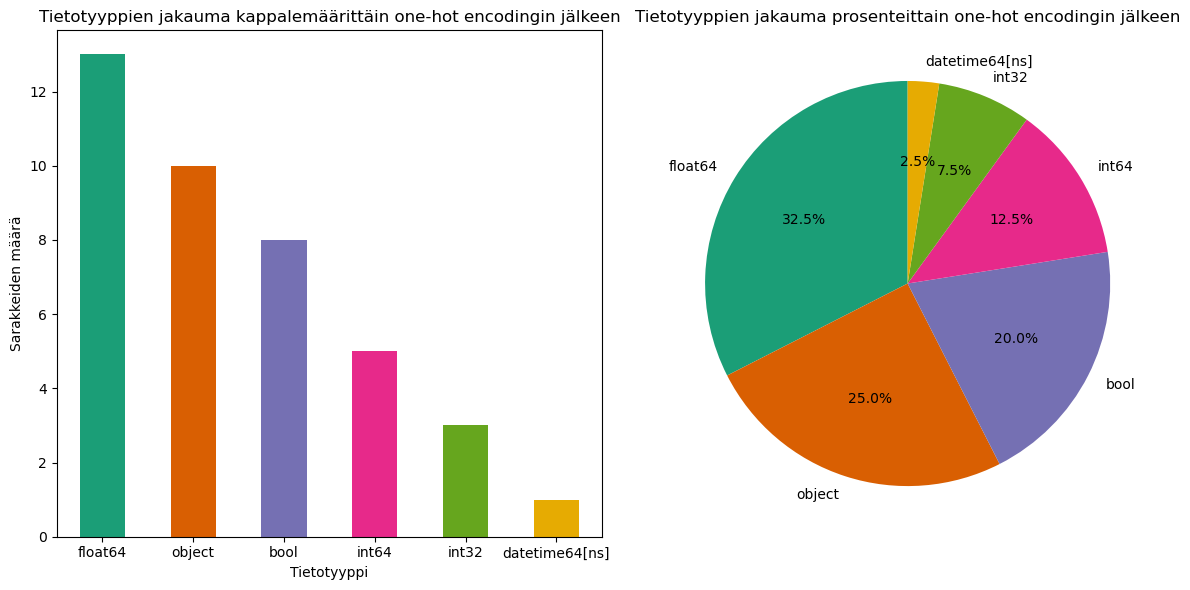

In [36]:
import matplotlib.pyplot as plt

data_types_plot3 = dataframe.dtypes.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Barplot
data_types_plot3.plot(
    kind="bar",
    ax=axes[0],
    title="Tietotyyppien jakauma kappalemäärittäin one-hot encodingin jälkeen",
    xlabel="Tietotyyppi",
    ylabel="Sarakkeiden määrä",
    color=colors
)

axes[0].tick_params(axis="x", rotation=0)

# Pie
data_types_plot3.plot(
    kind="pie",
    ax=axes[1],
    autopct="%1.1f%%",
    startangle=90,
    title="Tietotyyppien jakauma prosenteittain one-hot encodingin jälkeen",
    ylabel="",
    colors=colors
)

# Show the plot
plt.tight_layout()
plt.show()

# Datan skaalaaminen ja malliin vietävät sarakkeet

In [ ]:
from sklearn.preprocessing import LabelEncoder

fuel_type_encoder = LabelEncoder()
make_encoder = LabelEncoder()
city_encoder = LabelEncoder()
model_encoder = LabelEncoder()

#enkoodataan, niin monta saraketta
cleaned_df2['fuel_type_encoded'] = city_encoder.fit_transform(cleaned_df2['fuel_type'])
cleaned_df2['make_encoded'] = make_encoder.fit_transform(cleaned_df2['franchise_make'])
cleaned_df2['city_encoded'] = city_encoder.fit_transform(cleaned_df2['city'])
cleaned_df2['model_encoded'] = model_encoder.fit_transform(cleaned_df2['model_name'])

In [57]:
print(len(cleaned_df2['franchise_make'].unique()))
print(len(cleaned_df2['make_name'].unique()))
list1 = cleaned_df2['franchise_make'].unique()
list2 = cleaned_df2['make_name'].unique()

unique_to_list1 = set(list1) - set(list2)
print(unique_to_list1)

48
47
{'Ferrari'}


Poistetaan siis vielä tuo make_name sillä sisältää vähemmän tietoja kuin franchise_make

In [ ]:
# sarakkeet jota jätetään pois mallintamisen vaiheessa, tekstipohjaiset visuaalisaation jälkeen poistettava

pudotettavat = ['listing_color', 'make_name']
enkoodatut = ['fuel_type', 'franchise_make', 'city', 'model_name'] #jatkon kannalta talteen

cleaned_df2.drop(columns=pudotettavat, inplace=True)

final_df = cleaned_df2
final_df.head(2)

### Datan skaalaaminen

In [ ]:
#tähän skaalaukset



21.11.2024 klo 22.32: Mielestäni jää enää siis:

1. major_options <- sarakkeen käsittely (en ehtinyt yhtään paneutua tai miettiä mitenkä tämän kanssa) Oli kuitenkin yhtenä vaatimusmäärittelyn/asiakkaan kysymyksenä, miten lisäominaisuudet vaikuttavat haluttavuuteen

2. mahd. mietintä tehdäänkö "new features" eli tarviiko jotain lisätä? <- tätä joudetaa miettimään kun päästää eteenpäin
3. visualisaatio <- #Pekkatekeesunnuntaina ja saa muutkin tehdä ´:)
4. skaalaus
5. luokkamuuttujat?

## Phase 3 guide (Data Preparation)

* Select data
* Clean the data
* Integrate data
* Format data
* Construct the data

## Additional questions:

* Handling of missing values
* Handling of outliers
* Remove "unnecessary features"
* Add "new features"
* Also visualize after preprocessing
* Perform data scaling
* Classification class variable?

Important: The result data from this phase should have good quality for the next step, i.e. modeling.